In [1]:
import numpy as np
import pandas as pd
import os
from shutil import copyfile
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import colorlover as cl


import neuro_morpho_toolbox as nmt
%matplotlib inline
import pickle
pickle_in = open("/home/penglab/FeaCal/all_ns.pickle","rb")
[ns] = pickle.load(pickle_in)


/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox-0.1-py3.7.egg/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 1.08
Loading CCF brain structure data...
Loading time: 0.01


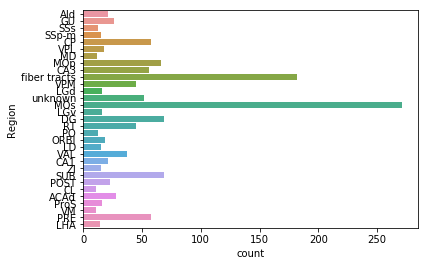

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

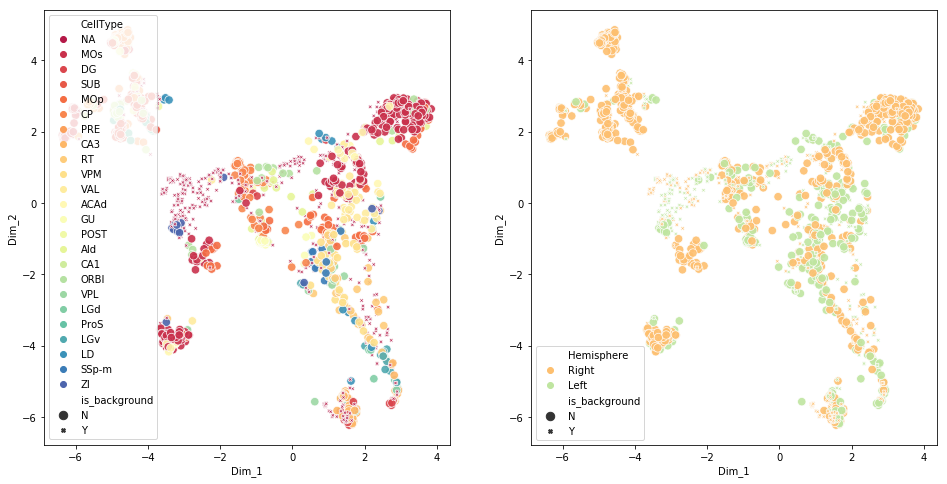

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere"], map="UMAP")

In [4]:
import multiprocessing
import time
def Contour_Matrix(M_ori,x_in, y_in, z_in):
    
    centerV =  M_ori[x_in,y_in, z_in]  
    
    x1 = M_ori[max(0,x_in-1),y_in,z_in]            # -1,0,0
    x2 = M_ori[min(M_ori.shape[0]-1,x_in+1),y_in,z_in]#+1,0,0
    y1 = M_ori[x_in,max(0,y_in-1),z_in]# 0,-1,0
    y2 = M_ori[x_in,min(M_ori.shape[1]-1,y_in+1),z_in] # 0,+1,0
    z1 = M_ori[x_in,y_in,max(0,z_in-1)]# 0,0,-1
    z2 = M_ori[x_in,y_in,min(M_ori.shape[2]-1,z_in+1)]# 0,0,+1
    if not all(v == centerV for v in [x1,x2,y1,y2,z1,z2]):
        return [x_in,y_in,z_in]

corenum = 12
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

start = time.perf_counter ()
start=time.time()
iterReg = 0
cores = corenum#multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cores)
# array where the index is not 0
M_region = nmt.annotation.array.copy()
M_region = M_region!= iterReg  # a np.ndarray
M_origin = nmt.annotation.array.copy()
co_1,co_2,co_3 = np.where(nmt.annotation.array != 0) 

pool_list=[]
result_list=[]
for iter_COR in range(len(co_1)):
    pool_list.append(pool.apply_async(Contour_Matrix, (M_origin, co_1[iter_COR], 
                                                       co_2[iter_COR], co_3[iter_COR])))
    if iter_COR%10000==0:
        print('Loading progess: %.6f' % (iter_COR/len(co_1)))
print('Have finished the checking part')
result_list=[xx.get() for xx in pool_list]

pool.close()
pool.join()
elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
#ContourDic['ALL']= ([xx for xx in  result_list])

Loading progess: 0.000000
Loading progess: 0.000309
Loading progess: 0.000618
Loading progess: 0.000926
Loading progess: 0.001235
Loading progess: 0.001544
Loading progess: 0.001853
Loading progess: 0.002161
Loading progess: 0.002470
Loading progess: 0.002779
Loading progess: 0.003088
Loading progess: 0.003396
Loading progess: 0.003705
Loading progess: 0.004014
Loading progess: 0.004323
Loading progess: 0.004631
Loading progess: 0.004940
Loading progess: 0.005249
Loading progess: 0.005558
Loading progess: 0.005866
Loading progess: 0.006175
Loading progess: 0.006484
Loading progess: 0.006793
Loading progess: 0.007102
Loading progess: 0.007410
Loading progess: 0.007719
Loading progess: 0.008028
Loading progess: 0.008337
Loading progess: 0.008645
Loading progess: 0.008954
Loading progess: 0.009263
Loading progess: 0.009572
Loading progess: 0.009880
Loading progess: 0.010189
Loading progess: 0.010498
Loading progess: 0.010807
Loading progess: 0.011115
Loading progess: 0.011424
Loading prog

Loading progess: 0.097878
Loading progess: 0.098186
Loading progess: 0.098495
Loading progess: 0.098804
Loading progess: 0.099113
Loading progess: 0.099421
Loading progess: 0.099730
Loading progess: 0.100039
Loading progess: 0.100348
Loading progess: 0.100656
Loading progess: 0.100965
Loading progess: 0.101274
Loading progess: 0.101583
Loading progess: 0.101892
Loading progess: 0.102200
Loading progess: 0.102509
Loading progess: 0.102818
Loading progess: 0.103127
Loading progess: 0.103435
Loading progess: 0.103744
Loading progess: 0.104053
Loading progess: 0.104362
Loading progess: 0.104670
Loading progess: 0.104979
Loading progess: 0.105288
Loading progess: 0.105597
Loading progess: 0.105905
Loading progess: 0.106214
Loading progess: 0.106523
Loading progess: 0.106832
Loading progess: 0.107140
Loading progess: 0.107449
Loading progess: 0.107758
Loading progess: 0.108067
Loading progess: 0.108376
Loading progess: 0.108684
Loading progess: 0.108993
Loading progess: 0.109302
Loading prog

Loading progess: 0.195755
Loading progess: 0.196064
Loading progess: 0.196373
Loading progess: 0.196682
Loading progess: 0.196990
Loading progess: 0.197299
Loading progess: 0.197608
Loading progess: 0.197917
Loading progess: 0.198225
Loading progess: 0.198534
Loading progess: 0.198843
Loading progess: 0.199152
Loading progess: 0.199460
Loading progess: 0.199769
Loading progess: 0.200078
Loading progess: 0.200387
Loading progess: 0.200695
Loading progess: 0.201004
Loading progess: 0.201313
Loading progess: 0.201622
Loading progess: 0.201930
Loading progess: 0.202239
Loading progess: 0.202548
Loading progess: 0.202857
Loading progess: 0.203166
Loading progess: 0.203474
Loading progess: 0.203783
Loading progess: 0.204092
Loading progess: 0.204401
Loading progess: 0.204709
Loading progess: 0.205018
Loading progess: 0.205327
Loading progess: 0.205636
Loading progess: 0.205944
Loading progess: 0.206253
Loading progess: 0.206562
Loading progess: 0.206871
Loading progess: 0.207179
Loading prog

Loading progess: 0.293324
Loading progess: 0.293633
Loading progess: 0.293942
Loading progess: 0.294250
Loading progess: 0.294559
Loading progess: 0.294868
Loading progess: 0.295177
Loading progess: 0.295485
Loading progess: 0.295794
Loading progess: 0.296103
Loading progess: 0.296412
Loading progess: 0.296720
Loading progess: 0.297029
Loading progess: 0.297338
Loading progess: 0.297647
Loading progess: 0.297956
Loading progess: 0.298264
Loading progess: 0.298573
Loading progess: 0.298882
Loading progess: 0.299191
Loading progess: 0.299499
Loading progess: 0.299808
Loading progess: 0.300117
Loading progess: 0.300426
Loading progess: 0.300734
Loading progess: 0.301043
Loading progess: 0.301352
Loading progess: 0.301661
Loading progess: 0.301969
Loading progess: 0.302278
Loading progess: 0.302587
Loading progess: 0.302896
Loading progess: 0.303204
Loading progess: 0.303513
Loading progess: 0.303822
Loading progess: 0.304131
Loading progess: 0.304440
Loading progess: 0.304748
Loading prog

Loading progess: 0.390893
Loading progess: 0.391202
Loading progess: 0.391510
Loading progess: 0.391819
Loading progess: 0.392128
Loading progess: 0.392437
Loading progess: 0.392746
Loading progess: 0.393054
Loading progess: 0.393363
Loading progess: 0.393672
Loading progess: 0.393981
Loading progess: 0.394289
Loading progess: 0.394598
Loading progess: 0.394907
Loading progess: 0.395216
Loading progess: 0.395524
Loading progess: 0.395833
Loading progess: 0.396142
Loading progess: 0.396451
Loading progess: 0.396759
Loading progess: 0.397068
Loading progess: 0.397377
Loading progess: 0.397686
Loading progess: 0.397994
Loading progess: 0.398303
Loading progess: 0.398612
Loading progess: 0.398921
Loading progess: 0.399230
Loading progess: 0.399538
Loading progess: 0.399847
Loading progess: 0.400156
Loading progess: 0.400465
Loading progess: 0.400773
Loading progess: 0.401082
Loading progess: 0.401391
Loading progess: 0.401700
Loading progess: 0.402008
Loading progess: 0.402317
Loading prog

Loading progess: 0.488462
Loading progess: 0.488771
Loading progess: 0.489079
Loading progess: 0.489388
Loading progess: 0.489697
Loading progess: 0.490006
Loading progess: 0.490314
Loading progess: 0.490623
Loading progess: 0.490932
Loading progess: 0.491241
Loading progess: 0.491549
Loading progess: 0.491858
Loading progess: 0.492167
Loading progess: 0.492476
Loading progess: 0.492784
Loading progess: 0.493093
Loading progess: 0.493402
Loading progess: 0.493711
Loading progess: 0.494020
Loading progess: 0.494328
Loading progess: 0.494637
Loading progess: 0.494946
Loading progess: 0.495255
Loading progess: 0.495563
Loading progess: 0.495872
Loading progess: 0.496181
Loading progess: 0.496490
Loading progess: 0.496798
Loading progess: 0.497107
Loading progess: 0.497416
Loading progess: 0.497725
Loading progess: 0.498033
Loading progess: 0.498342
Loading progess: 0.498651
Loading progess: 0.498960
Loading progess: 0.499268
Loading progess: 0.499577
Loading progess: 0.499886
Loading prog

Loading progess: 0.586339
Loading progess: 0.586648
Loading progess: 0.586957
Loading progess: 0.587266
Loading progess: 0.587574
Loading progess: 0.587883
Loading progess: 0.588192
Loading progess: 0.588501
Loading progess: 0.588810
Loading progess: 0.589118
Loading progess: 0.589427
Loading progess: 0.589736
Loading progess: 0.590045
Loading progess: 0.590353
Loading progess: 0.590662
Loading progess: 0.590971
Loading progess: 0.591280
Loading progess: 0.591588
Loading progess: 0.591897
Loading progess: 0.592206
Loading progess: 0.592515
Loading progess: 0.592823
Loading progess: 0.593132
Loading progess: 0.593441
Loading progess: 0.593750
Loading progess: 0.594058
Loading progess: 0.594367
Loading progess: 0.594676
Loading progess: 0.594985
Loading progess: 0.595294
Loading progess: 0.595602
Loading progess: 0.595911
Loading progess: 0.596220
Loading progess: 0.596529
Loading progess: 0.596837
Loading progess: 0.597146
Loading progess: 0.597455
Loading progess: 0.597764
Loading prog

Loading progess: 0.683908
Loading progess: 0.684217
Loading progess: 0.684526
Loading progess: 0.684835
Loading progess: 0.685143
Loading progess: 0.685452
Loading progess: 0.685761
Loading progess: 0.686070
Loading progess: 0.686378
Loading progess: 0.686687
Loading progess: 0.686996
Loading progess: 0.687305
Loading progess: 0.687613
Loading progess: 0.687922
Loading progess: 0.688231
Loading progess: 0.688540
Loading progess: 0.688848
Loading progess: 0.689157
Loading progess: 0.689466
Loading progess: 0.689775
Loading progess: 0.690084
Loading progess: 0.690392
Loading progess: 0.690701
Loading progess: 0.691010
Loading progess: 0.691319
Loading progess: 0.691627
Loading progess: 0.691936
Loading progess: 0.692245
Loading progess: 0.692554
Loading progess: 0.692862
Loading progess: 0.693171
Loading progess: 0.693480
Loading progess: 0.693789
Loading progess: 0.694097
Loading progess: 0.694406
Loading progess: 0.694715
Loading progess: 0.695024
Loading progess: 0.695332
Loading prog

Loading progess: 0.781786
Loading progess: 0.782095
Loading progess: 0.782403
Loading progess: 0.782712
Loading progess: 0.783021
Loading progess: 0.783330
Loading progess: 0.783638
Loading progess: 0.783947
Loading progess: 0.784256
Loading progess: 0.784565
Loading progess: 0.784873
Loading progess: 0.785182
Loading progess: 0.785491
Loading progess: 0.785800
Loading progess: 0.786109
Loading progess: 0.786417
Loading progess: 0.786726
Loading progess: 0.787035
Loading progess: 0.787344
Loading progess: 0.787652
Loading progess: 0.787961
Loading progess: 0.788270
Loading progess: 0.788579
Loading progess: 0.788887
Loading progess: 0.789196
Loading progess: 0.789505
Loading progess: 0.789814
Loading progess: 0.790122
Loading progess: 0.790431
Loading progess: 0.790740
Loading progess: 0.791049
Loading progess: 0.791357
Loading progess: 0.791666
Loading progess: 0.791975
Loading progess: 0.792284
Loading progess: 0.792593
Loading progess: 0.792901
Loading progess: 0.793210
Loading prog

Loading progess: 0.879972
Loading progess: 0.880281
Loading progess: 0.880590
Loading progess: 0.880899
Loading progess: 0.881207
Loading progess: 0.881516
Loading progess: 0.881825
Loading progess: 0.882134
Loading progess: 0.882442
Loading progess: 0.882751
Loading progess: 0.883060
Loading progess: 0.883369
Loading progess: 0.883677
Loading progess: 0.883986
Loading progess: 0.884295
Loading progess: 0.884604
Loading progess: 0.884912
Loading progess: 0.885221
Loading progess: 0.885530
Loading progess: 0.885839
Loading progess: 0.886147
Loading progess: 0.886456
Loading progess: 0.886765
Loading progess: 0.887074
Loading progess: 0.887383
Loading progess: 0.887691
Loading progess: 0.888000
Loading progess: 0.888309
Loading progess: 0.888618
Loading progess: 0.888926
Loading progess: 0.889235
Loading progess: 0.889544
Loading progess: 0.889853
Loading progess: 0.890161
Loading progess: 0.890470
Loading progess: 0.890779
Loading progess: 0.891088
Loading progess: 0.891396
Loading prog

Loading progess: 0.978159
Loading progess: 0.978467
Loading progess: 0.978776
Loading progess: 0.979085
Loading progess: 0.979394
Loading progess: 0.979702
Loading progess: 0.980011
Loading progess: 0.980320
Loading progess: 0.980629
Loading progess: 0.980937
Loading progess: 0.981246
Loading progess: 0.981555
Loading progess: 0.981864
Loading progess: 0.982173
Loading progess: 0.982481
Loading progess: 0.982790
Loading progess: 0.983099
Loading progess: 0.983408
Loading progess: 0.983716
Loading progess: 0.984025
Loading progess: 0.984334
Loading progess: 0.984643
Loading progess: 0.984951
Loading progess: 0.985260
Loading progess: 0.985569
Loading progess: 0.985878
Loading progess: 0.986186
Loading progess: 0.986495
Loading progess: 0.986804
Loading progess: 0.987113
Loading progess: 0.987421
Loading progess: 0.987730
Loading progess: 0.988039
Loading progess: 0.988348
Loading progess: 0.988657
Loading progess: 0.988965
Loading progess: 0.989274
Loading progess: 0.989583
Loading prog

Process ForkPoolWorker-12:
Process ForkPoolWorker-8:
Process ForkPoolWorker-6:
Process ForkPoolWorker-9:
Process ForkPoolWorker-4:
Process ForkPoolWorker-10:
Process ForkPoolWorker-11:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File 

  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/penglab/anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
result_list

In [ ]:
ContourDic = {}
for i in Regtype[1:]:
    

In [ ]:
def id_to_name(self, region_ID):
        # region_name can be either Abbreviation (checked first) or description
        if region_ID in self.level.index.tolist():
            return self.level.loc[region_ID,'Abbreviation']
        else:
            print("Cannot find any regions with ID %s." % region_ID)

In [ ]:
import multiprocessing
import time
def Contour_Matrix(M_ori, M_contour, x_in, y_in, z_in):
    assert np.sum(M_contour)== 0
    assert M_contour.shape == M_ori.shape
    centerV =  M_ori[x_in,y_in, z_in]  
    assert M_ori.shape == nmt.annotation.array.shape
    x1 = M_ori[max(0,x_in-1),y_in,z_in]            # -1,0,0
    x2 = M_ori[min(M_ori.shape[0]-1,x_in+1),y_in,z_in]#+1,0,0
    y1 = M_ori[x_in,max(0,y_in-1),z_in]# 0,-1,0
    y2 = M_ori[x_in,min(M_ori.shape[1]-1,y_in+1),z_in] # 0,+1,0
    z1 = M_ori[x_in,y_in,max(0,z_in-1)]# 0,0,-1
    z2 = M_ori[x_in,y_in,min(M_ori.shape[2]-1,z_in+1)]# 0,0,+1
    if not all(v == centerV for v in [x1,x2,y1,y2,z1,z2]):
        M_contour[x_in,y_in,z_in] = centerV
    return M_contour.copy()

In [ ]:


corenum = 20
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

start = time.perf_counter ()
start=time.time()
iterReg = 0
cores = corenum#multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cores)
# array where the index is not 0
M_region = nmt.annotation.array.copy()
M_region = M_region!= iterReg  # a np.ndarray
M_origin = nmt.annotation.array.copy()
co_1,co_2,co_3 = np.where(nmt.annotation.array != 0) 
borderM = nmt.annotation.array.copy()
borderM[:,:,:] = 0
pool_list=[]
result_list=[]
for iter_COR in range(len(co_1)):
    pool_list.append(pool.apply_async(Contour_Matrix, (M_origin,borderM, co_1[iter_COR], co_2[iter_COR], co_3[iter_COR])))
    print('Loading progess: %.6f' % (iter_COR/len(co_1)))
result_list=[xx.get() for xx in pool_list]

pool.close()
pool.join()
elapsed = (time.time() - start)
print('Time needed to run the whole matrix is '+ str(elapsed))
ContourDic['ALL']= sum([xx for xx in  result_list])

In [ ]:
aaa = np.zeros(nmt.annotation.array.shape)

In [ ]:
aaa.shape

In [ ]:
M_origin[1,1,1]=5
M_ttt = M_origin.copy()
M_ttt[1,1,1]=14
M_origin[1,1,1]

In [ ]:


corenum = 12
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

start = time.perf_counter ()
start=time.time()
iterReg = 0
cores = corenum#multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cores)
# array where the index is not 0
M_region = nmt.annotation.array.copy()
M_region = M_region!= iterReg  # a np.ndarray
M_origin = nmt.annotation.array.copy()
co_1,co_2,co_3 = np.where(nmt.annotation.array != 0) 

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array != 0)
len(co_1)

In [ ]:


hier_resultDF = pd.read_excel('/home/penglab/NMTcode/hier_resultDF.xlsx')
kmeans_resultDF = pd.read_excel('/home/penglab/NMTcode/kmeans_resultDF.xlsx')
dbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/dbscan_resultDF.xlsx')
hdbscan_resultDF = pd.read_excel('/home/penglab/NMTcode/hdbscan_resultDF.xlsx')
snn_resultDF= pd.read_excel('/home/penglab/NMTcode/snn_resultDF.xlsx')


In [ ]:
x1 = np.arange(9).reshape((3, 3))
x2 = np.arange(9).reshape((3, 3))
np.dot(x1,x2)

### 6- nearest array

In [ ]:
M_mask = nmt.annotation.array.copy()
np.sum(M_mask)

In [ ]:
co_1[iter_pixel]+2

In [ ]:
M_mask[co_1[iter_pixel]-1:co_1[iter_pixel]+2,co_2[iter_pixel]-1:co_2[iter_pixel]+2,co_3[iter_pixel]-1:co_3[iter_pixel]+2] = 1

In [ ]:
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,55-1):min(M_mask.shape[0],55+1),
                   max(0,55-1):min(M_mask.shape[1],55+1),
               max(0,55-1):min(M_mask.shape[2],55+1)] = 1
        print(np.sum(np.sum(M_mask)))

In [ ]:
Regtype

### Single line

### Parallel processing

In [ ]:
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}
i_p=0
for iterReg in Regtype[1:]:
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_region==0,M_mask)))>0:
            borderM[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
        print('Loading progess inside region ' +str(iterReg)+' : %.5f' % (iter_pixel/len(co_1)))
    ContourDic[iterReg] = borderM
    print('Loading progess for all brain regions: %.2f' % (i_p/len(Regtype)))

In [ ]:
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1

In [ ]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    for iter_pixel in range(len(co_1)):
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
    return 

In [ ]:
import multiprocessing
import time
def Contour_Matrix(M_reg, M_contour, co_1_iter, co_2_iter, co_3_iter):
    M_contour = nmt.annotation.array.copy()
    M_contour[:,:,:] = 0
    for iter_pixel in range(len(co_1_iter)):
        print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
        M_mask = nmt.annotation.array.copy()
        M_mask[:,:,:] = 0
        assert M_mask.shape == nmt.annotation.array.shape
        M_mask[max(0,co_1[iter_pixel]-1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[min(nmt.annotation.array.shape[0]-1,co_1[iter_pixel]+1),co_2[iter_pixel],co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],max(0,co_2[iter_pixel]-1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],min(nmt.annotation.array.shape[1]-1,co_2[iter_pixel]+1),co_3[iter_pixel]]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],max(0,co_3[iter_pixel]-1)]=1
        M_mask[co_1[iter_pixel],co_2[iter_pixel],min(nmt.annotation.array.shape[2]-1,co_3[iter_pixel]+1)]=1
        assert M_mask.shape == nmt.annotation.array.shape
        if np.sum(np.sum(np.multiply(M_reg==0,M_mask)))>0:
            M_contour[co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]]=1
            #print((co_1[iter_pixel],co_2[iter_pixel],co_2[iter_pixel]))
    return 



In [ ]:
corenum = 12
Regtype, Regcount = np.unique(nmt.annotation.array, return_counts=True) 

ContourDic = {}

for iterReg in Regtype[::-1]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array != iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(Contour_Matrix, (M_region,borderM, co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print(sum([xx for xx in  result_list]))
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
    print('Time needed to run region '+ str(iterReg)+ 'is '+ str(elapsed))
    ContourDic[iterReg]= sum([xx for xx in  result_list])

In [ ]:
import time
import multiprocessing
def test1(borderM, x,y,z):
    print(len(x))
    borderM[x,y,z]=1
    return(x*x,y*y,z*z)

corenum = 12

i_p=0
for iterReg in Regtype[1:]:
    start = time.perf_counter ()
    start=time.time()
    cores = corenum#multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=cores)
    M_region = nmt.annotation.array == iterReg  # a np.ndarray
    co_1,co_2,co_3 = np.where(nmt.annotation.array == iterReg) 
    co_1 = (np.arange(10))
    co_2 = (np.arange(5))
    co_3 = (np.arange(6))
    borderM = nmt.annotation.array.copy()
    borderM[:,:,:] = 0
    pool_list=[]
    result_list=[]
    pool_list.append(pool.apply_async(test1, (borderM,co_1, co_2, co_3)))
        # 这里不能 get， 会阻塞进程

    #pool.apply_async之后的语句都是阻塞执行的，
    #调用 result.get() 会等待上一个任务执行完之后才会分配下一个任务。
    #事实上，获取返回值的过程最好放在进程池回收之后进行，避免阻塞后面的语句。
    result_list=[xx.get() for xx in pool_list]
    print([xx for xx in  result_list])
    # 最后我们使用一下语句回收进程池:
    pool.close()
    pool.join()
    elapsed = (time.time() - start)
   

In [ ]:
np.arange(10)

In [ ]:
somaDF = ns.features['soma_features'].raw_data.copy()
for iter_idx in somaDF.index.tolist():
    ID_temp = nmt.annotation.array[somaDF.loc[iter_idx,'x'],somaDF.loc[iter_idx,'y'],somaDF.loc[iter_idx,'z']]
    M_region = nmt.annotation.array == ID_temp  # a np.ndarray
    M_mask = nmt.annotation.array.copy()
    M_mask[:,:,:] = 0
    mul_i = 1
    while np.sum(np.sum(np.multiply(M_region, M_mask)))==0:
        x_range_1 = somaDF.loc[iter_idx,'x']-5* mul_i
        x_range_2 = somaDF.loc[iter_idx,'x']+5* mul_i
        y_range_1 = somaDF.loc[iter_idx,'y']-5* mul_i
        y_range_2 = somaDF.loc[iter_idx,'y']+5* mul_i    
        z_range_1 = somaDF.loc[iter_idx,'z']-5* mul_i
        z_range_2 = somaDF.loc[iter_idx,'z']+5* mul_i  
        M_mask[x_range_1:x_range_2,:,:] = 0
        mul_i = mul_i +1

In [ ]:
# shape
print('Shape: ', nmt.annotation.array.shape)

# dtype
print('Datatype: ', nmt.annotation.array.dtype)

# size
print('Size: ', nmt.annotation.array.size)

# ndim
print('Num Dimensions: ', nmt.annotation.array.ndim)

In [ ]:
ns.features['soma_features'].raw_data



%matplotlib notebook
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3>=nmt.annotation.size['z']//4]
co_2 = co_2[co_3>=nmt.annotation.size['z']//4]
co_3 = co_3[co_3>=nmt.annotation.size['z']//4]
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ax = fig.add_subplot(111, projection='3d')
ax.scatter(co_1, co_2, co_3, c='r', marker='o')


co_4,co_5,co_6 = np.where(nmt.annotation.array==0)

#choose_4 = np.sum((nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//4))
#choose_5 = np.sum((min(co_2)<=co_5)&(co_5<=max(co_2)))
#choose_6 = np.sum((min(co_3)<=co_6)&(co_6<=max(co_3)))



    
ax.scatter(co_4[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_5[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], co_6[(nmt.annotation.size['z']//4<=co_4)&(co_4<=nmt.annotation.size['z']//2)], c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
type(co_1)

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)

In [ ]:
list9 = list(zip(co_1,co_2,co_3))
list9[0]

In [ ]:
co_1,co_2,co_3 = np.where(nmt.annotation.array==9)
co_1 = co_1[co_3<=nmt.annotation.size['z']//2]
co_2 = co_2[co_3<=nmt.annotation.size['z']//2]
co_3 = co_3[co_3<=nmt.annotation.size['z']//2]
ls_9x = []
ls_9y = []
ls_9z = []
ls_other= []
for x,y,z in zip(co_1,co_2,co_3):
    for i in range(-1,2):
        for j in range(-1,2):
            for k in range(-1,2):
                if nmt.annotation.array[x+i,y+j,z+k] !=9:
                    print(nmt.annotation.array[x+i,y+j,z+k])
                    ls_9x.append(x)
                    ls_9y.append(y)
                    ls_9z.append(z)
                    ls_other.append(nmt.annotation.array[x+i,y+j,z+k])


In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ls_9x, ls_9y, ls_9z, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
IDtype, IDcount = np.unique(ls_other, return_counts=True) 

In [ ]:
IDtype

In [ ]:
list(zip(co_1,co_2,co_3))
ls_9 = []
ls_0 = []

for i in range(-1,2):
    for j in range(-1,2):
        for k in range(-1,2):
            if nmt.annotation.array[x+i,y+j,z+k] != nmt.annotation.array[x,y,z]:
                ls.append([x,y,z])


In [ ]:
co_2

In [ ]:
from scipy.spatial import distance
import ast
import time
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    start = time.time()
    raw_data = ns.features['soma_features'].raw_data
    somaDF = raw_data.copy()
    scaledDF = pd.DataFrame()
    scaledDF["x"] = (somaDF["x"] / nmt.annotation.space["x"]).copy()
    scaledDF["y"] = (somaDF["y"] / nmt.annotation.space["y"]).copy()
    scaledDF["z"] = (somaDF["z"] / nmt.annotation.space["z"]).copy()
    #flip the somalocation
    scaledDF["z"][scaledDF['z']>(nmt.annotation.size["z"]//2)] = scaledDF["z"][scaledDF["z"]>(nmt.annotation.size['z']//2)] -nmt.annotation.size["z"]//2 
    i_p = 0
    for idx in scaledDF.index.tolist():
        i_p = i_p+1
        tempCoor = np.array([[scaledDF.loc[idx,'x'],scaledDF.loc[idx,'y'],scaledDF.loc[idx,'z']]])
        tempID = nmt.annotation.array[int(scaledDF.loc[idx,'x']),int(scaledDF.loc[idx,'y']),int(scaledDF.loc[idx,'z'])]
        coords = []
        if regionINFO.loc[tempID ,'Vx']=='unknown' :
            scaledDF.loc[idx,'SqEuclidean'] = 'unknown'
            continue
        if regionINFO.loc[tempID ,'Vx']=='oob' :
            scaledDF.loc[idx,'SqEuclidean'] = 'oob'
            continue
        for icoor in range(len(ast.literal_eval(regionINFO.loc[tempID ,'Vx']))):
            coords.append([ast.literal_eval(regionINFO.loc[tempID ,'Vx'])[icoor],
                           ast.literal_eval(regionINFO.loc[tempID ,'Vy'])[icoor],
                                            ast.literal_eval(regionINFO.loc[tempID ,'Vz'])[icoor]])
        zs = np.sort(distance.cdist(tempCoor,coords, 'sqeuclidean'))[0,0:min(10,distance.cdist(tempCoor,coords, 'sqeuclidean').shape[1])]
        scaledDF.loc[idx,'SqEuclidean'] = str(zs.tolist())
        
        print('Load progress: %.5f'% (i_p/scaledDF.shape[0]))
    end = time.time()
    print("Total loading time: %.2f" % (end-start))
    return scaledDF.copy()

In [ ]:
for idx in scaled_result.index.tolist():
    

In [ ]:
scaled_result = metric_Cal(ns.features['soma_features'].raw_data, regionINFO)

In [ ]:
scaled_result.to_excel('/home/penglab/NMTcode/somaINFO.xlsx')

In [ ]:

for idx in scaled_result.index.tolist():
    templist = scaled_result.loc[idx,'SqEuclidean'].replace("[", "").replace("]", "").replace(" ","").split(',')
    scaled_result.loc[idx,'minDIS'] = templist[0]

In [ ]:
scaled_result['minDIS']

In [ ]:
import plotly 
import plotly.graph_objs as go

import scipy
y = scaled_result['minDIS'].astype(float).values.tolist()

fig = plotly.figure_factory.create_violin(y, title='Violin Plot', colors='#604d9e')
#py.iplot(fig, filename='alcohol-violin-visual')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



fig, axes = plt.subplots()

axes.violinplot(dataset = [scaled_result['minDIS'].astype(float).values] )

axes.set_title('Soma Loc v.s. Region Vertices distance')
axes.yaxis.grid(True)
axes.set_xlabel('')
axes.set_ylabel('min distance')

plt.show()

In [ ]:
nmt.annotation.array[230,13,54]

In [ ]:
np.mean(scaled_result['minDIS'].astype(float))

have a higher density at . That is very significant because as in the SepalLengthCm description, a mean value is at 9067.528044686285.

In [ ]:
import seaborn as sns
sns.set(style="dark")
ax = sns.violinplot(x=scaled_result['minDIS'].astype(float),palette="Set2")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull


# 8 points defining the cube corners
pts = np.array(coordi)#np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                #[0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], ])

hull = ConvexHull(pts)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)


# Make axis label
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()

In [ ]:
ns.features['soma_features'].raw_data

In [ ]:
from scipy.spatial import distance
import ast
#ns.features['soma_features'].raw_data
def metric_Cal(raw_data, regionINFO):
    somaDF = raw_data.copy()
    for idx in somaDF.index.tolist():
        tempCoor = np.array([(somaDF.loc[idx,'x'],somaDF.loc[idx,'y'],somaDF.loc[idx,'z'])])
        zs = np.sum(distance.cdist(tempCoor , ast.literal_eval(regionINFO.loc[idx,'Coor']), 'sqeuclidean'))
        somaDF.loc[idx,'SUMsqeuclidean'] = zs
    return somaDF.copy()